In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt

In [11]:

df1 = pd.read_csv('processed_news_data.csv')
df2 = pd.read_csv('processed_Bengali-Drama_Data.csv')
df3 = pd.read_csv('processed_cricket_data.csv')
df4 = pd.read_csv('processed_restaurant_data.csv')
#combine all the dataframes into one
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df['sentiment'] = df['sentiment'].astype(int)
df.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df.head(5)

,SL,text,Category,Tag
0,0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",service,negative
1,1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",food,positive
2,2,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",anecdotes/miscellaneous,negative
3,3,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",food,positive
4,4,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,service,positive


In [ ]:
df.drop(columns=['SL', 'Category'], inplace=True)

In [ ]:
# Define the mapping
tag_mapping = {
    "negative": 0,
    "positive": 1,
    "neutral": 2
}

# Create a new column with the mapped values
df['sentiment'] = df['Tag'].map(tag_mapping)
df.head(5)

,text,Tag,sentiment
0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative,0.0
1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",positive,1.0
2,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",negative,0.0
3,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",positive,1.0
4,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive,1.0


In [ ]:
#check null values
df.isnull().sum()

text           0
Tag            0
sentiment    115
dtype: int64

In [ ]:
df.to_csv("processed_restaurant_data.csv", index=False)


### EDA

In [ ]:
# Convert sentiment to a categorical type temporarily
df['sentiment'] = df['sentiment'].astype('category')

# Call describe again
df.describe(include='all')

,text,Tag,sentiment
count,2059,2059,1944.0
unique,1714,4,3.0
top,আমি দরিদ্র পর্যালোচনা দ্বারা বিস্মিত am- আমি এ...,positive,1.0
freq,4,1221,1221.0


In [ ]:

temp = df.groupby('sentiment').count()['text'].reset_index()


sentiment_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
temp['sentiment'] = temp['sentiment'].map(sentiment_mapping)


temp = temp.sort_values(by='sentiment')

temp.style.background_gradient(cmap='Purples')

,sentiment,text
0,negative,472
1,positive,1221
2,neutral,251


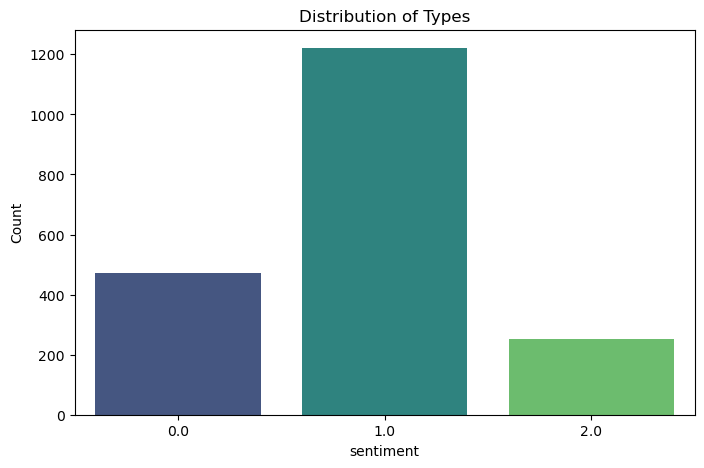

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

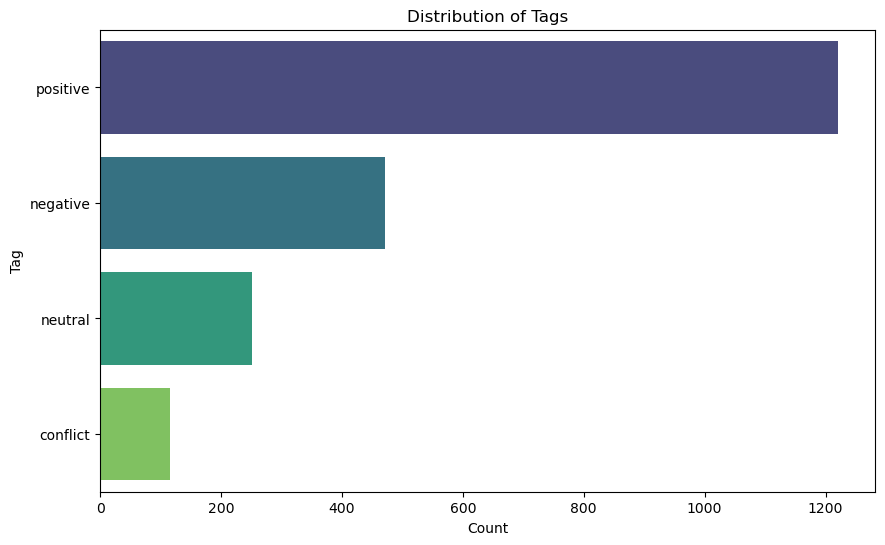

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tag', data=df, palette='viridis', order=df['Tag'].value_counts().index)
plt.title('Distribution of Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [ ]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text=temp.sentiment,
    values=temp.text,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()

#### Most common WOrds

In [ ]:
from collections import Counter

df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,এবং,875
1,একটি,538
2,আমি,464
3,জন্য,357
4,ভাল,297
5,ছিল,296
6,এটি,289
7,।,248
8,এই,226
9,আমার,213


In [ ]:
df['temp_list'] = df['text'].apply(lambda x: str(x).split())
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('bengali')]
df['temp_list'] = df['temp_list'].apply(remove_stopword)

In [ ]:
# Remove punctuation
def remove_punctuation(temp_list):
    return [re.sub(r'[“”"\'।।.,!?()\[\]{}<>;:।‘’–—…]', '', word) for word in temp_list]

df['temp_list'] = df['temp_list'].apply(remove_punctuation)

#### Most common words after removing stopwords

In [ ]:
def remove_space(x):
    return [y for y in x if y != '']
df['temp_list'] = df['temp_list'].apply(remove_space)

In [ ]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,ভাল,325
1,খাদ্য,218
2,ছিল,201
3,সেবা,152
4,খাবার,143
5,না,131
6,চমৎকার,108
7,সুস্বাদু,102
8,-,102
9,মহান,101


#### Most common words Sentiments Wise

In [ ]:
df.head(5)

,text,Tag,sentiment,temp_list
0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative,0.0,"[স্টাফ, কিন্তু, ভয়ঙ্কর, ছিল]"
1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",positive,1.0,"[শুধুমাত্ররিডামিং, ফ্যাক্টর, খাদ্য, ছিলপুরোপুর..."
2,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",negative,0.0,"[শুধুমাত্ররিডামিং, ফ্যাক্টর, খাদ্য, ছিলপুরোপুর..."
3,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",positive,1.0,"[খাবার, একদমই, ব্যতিক্রমী, সক্ষম, রান্নাঘর, গর..."
4,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive,1.0,"[গাব্রিয়েলা, লোকালি, আপনাকে, শুভেচ্ছা, জানায়..."


In [ ]:
Positive_sent = df[df['Tag']=='positive']
Negative_sent = df[df['Tag']=='negative']
Neutral_sent = df[df['Tag']=='neutral']

In [ ]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Purples')

,Common_words,count
0,ভাল,250
1,খাদ্য,144
2,সেবা,111
3,ছিল,110
4,খাবার,103
5,চমৎকার,91
6,মহান,87
7,সুস্বাদু,79
8,-,66
9,জায়গা,63


In [ ]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,ছিল,53
1,না,51
2,খাদ্য,49
3,ভাল,35
4,সেবা,26
5,ছিলাম,24
6,-,22
7,রেস্টুরেন্ট,21
8,সময়,20
9,নয়,19


In [ ]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,ভাল,17
2,খাবার,16
3,রেস্টুরেন্ট,16
4,বন্ধু,15
5,গিয়েছিলাম,14
6,করেছি,12
7,ছিল,11
8,খাদ্য,10
9,ছিলাম,9
10,রাতে,8


### Look at Unique Words in each Segment

In [ ]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

In [ ]:
def words_unique(Tag, numwords, raw_words):
    allother = []
    for item in df[df.Tag != Tag]['temp_list']:
        for word in item:
            allother.append(word)
    allother = list(set(allother))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.Tag == Tag]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words', 'count'])
    
    return Unique_words

#### Positive

In [ ]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,গ্রেট,23
1,যুক্তিসঙ্গত,21
2,পাস্তা,11
3,ভাজা,10
4,শীতল,9
5,ভালবাসা,9
6,বুদ্ধিমান,9
7,সুপার,7
8,প্রম্পট,7
9,কতটা,7


#### Negative unique

In [ ]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,কথোপকথন,5
1,দ্বিগুণ,4
2,অযৌক্তিক,4
3,অবাধ্য,4
4,জোরে,4
5,নেয়,4
6,চেকের,4
7,আসবে,3
8,শুনতে,3
9,শেষবার,3


#### Neutral Unique

In [ ]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Purples')

The top 10 unique words in Neutral Tweets are:


,words,count
0,ছুটিতে,3
1,পড়া,3
2,শুক্রবার,3
3,দম্পতি,3
4,পড়ার,3
5,করতে,2
6,সংস্থার,2
7,ভিত্তিতে,2
8,যেআমার,2
9,Ny,2
